In [3]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

# Question 1 :

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True, return_estimator=True,
)

In [6]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0)
cv_results_forest = cross_validate(
    forest, data, target, cv=10, return_train_score=True, return_estimator=True,
)

In [7]:
(cv_results_forest['test_score']>cv_results_tree['test_score']).sum()

10

# Question 2 :

In [8]:
forest_5_trees = RandomForestRegressor(n_estimators=5, random_state=0)
cv_results_forest_5_trees = cross_validate(
    forest_5_trees, data, target, cv=10, return_train_score=True, return_estimator=True,
)

In [9]:
forest_100_trees = RandomForestRegressor(n_estimators=100, random_state=0)
cv_results_forest_100_trees = cross_validate(
    forest_100_trees, data, target, cv=10, return_train_score=True, return_estimator=True,
)

In [10]:
(cv_results_forest_100_trees['test_score']>cv_results_forest_5_trees['test_score']).sum()

9

# Question 3 :

In [20]:
from sklearn.model_selection import validation_curve

rf = RandomForestRegressor(random_state=0)
n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
train_scores, test_scores = validation_curve(
    rf, data, target, param_name="n_estimators", param_range=n_estimators, cv=10, n_jobs=-1
  )

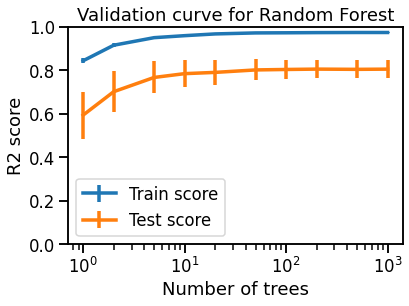

In [21]:
import matplotlib.pyplot as plt

plt.errorbar(
    n_estimators,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label="Train score",
)
plt.errorbar(
    n_estimators,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label="Test score",
)
plt.legend()
plt.xscale("log")
plt.xlabel("Number of trees")
plt.ylabel("R2 score")
plt.ylim([0, 1])
_ = plt.title("Validation curve for Random Forest")

# Question 4 :

In [22]:
from sklearn.model_selection import validation_curve

rf = RandomForestRegressor(max_depth=5, random_state=0)
n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
train_scores, test_scores = validation_curve(
    rf, data, target, param_name="n_estimators", param_range=n_estimators, cv=10, n_jobs=-1
  )

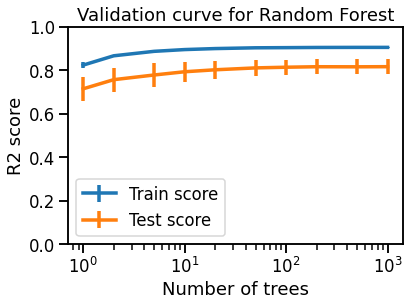

In [23]:
import matplotlib.pyplot as plt

plt.errorbar(
    n_estimators,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label="Train score",
)
plt.errorbar(
    n_estimators,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label="Test score",
)
plt.legend()
plt.xscale("log")
plt.xlabel("Number of trees")
plt.ylabel("R2 score")
plt.ylim([0, 1])
_ = plt.title("Validation curve for Random Forest")

# Question 5 :

In [24]:
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

In [25]:
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Question 6 :

In [4]:
%%time
from sklearn.model_selection import validation_curve
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(random_state=0)
max_iter = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
train_scores, test_scores = validation_curve(
    hgbr, data, target, param_name="max_iter", param_range=max_iter, cv=10, n_jobs=-1
  )

CPU times: total: 266 ms
Wall time: 12.9 s


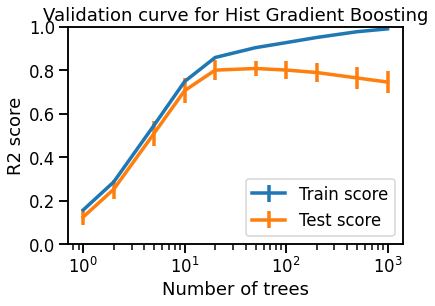

In [5]:
import matplotlib.pyplot as plt

plt.errorbar(
    max_iter,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label="Train score",
)
plt.errorbar(
    max_iter,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label="Test score",
)
plt.legend()
plt.xscale("log")
plt.xlabel("Number of trees")
plt.ylabel("R2 score")
plt.ylim([0, 1])
_ = plt.title("Validation curve for Hist Gradient Boosting")